Problem Statment :

* Dengan isu lingkungan dan kesehatan yang menjadi trending topik, penggunaan sepeda sebagai moda transportasi telah mendapatkan daya tarik dalam beberapa tahun terakhir. Untuk mendorong penggunaan sepeda, kota-kota di seluruh dunia telah berhasil meluncurkan program berbagi sepeda. Di bawah skema tersebut, pengendara dapat menyewa sepeda menggunakan kios manual/otomatis yang tersebar di seluruh kota untuk jangka waktu tertentu. Dalam kebanyakan kasus, pengendara dapat mengambil sepeda dari satu lokasi dan mengembalikannya ke tempat lain yang ditentukan.\


* Platform berbagi sepeda dari seluruh dunia adalah hotspot dari semua jenis data, mulai dari waktu perjalanan, lokasi awal dan akhir, demografi pengendara, dan sebagainya. Data ini bersama dengan sumber alternatif
informasi seperti cuaca, lalu lintas, medan, dan sebagainya menjadikannya proposisi yang menarik untuk area penelitian yang berbeda.\


* Dataset Capital Bike Sharing berisi informasi terkait dengan salah satu program bike sharing yang sedang berlangsung di Washington DC. Dengan kumpulan data yang diperbesar (detail berbagi sepeda bersama dengan informasi cuaca) ini, dapatkah kami memperkirakan permintaan sewa sepeda untuk program ini?

Dataset yang di sediakan :

* hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
* day.csv  : bike sharing counts aggregated on daily basis. Records: 731 days
    

# Exploratory Data Analysis

Preprocesing

In [1]:
# data manuipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling utilities
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

hour_df = pd.read_csv('hour.csv')
print('Shape of dataset::{}'.format(hour_df.shape))

Shape of dataset::(17379, 17)


In [2]:
hour_df.head() # Melihat cuplikan dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya, kita perlu memeriksa tipe data apa yang telah disimpulkan panda dan apakah ada atribut yang memerlukan konversi tipe. Cuplikan berikut membantu kami memeriksa tipe data dari semua atribut.

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Note :

Atribut dteday akan membutuhkan konversi tipe dari objek (atau tipe string) ke timestamp. Atribut seperti musim, hari libur, hari kerja, dan sebagainya disimpulkan sebagai bilangan bulat oleh panda, dan atribut tersebut memerlukan konversi ke kategorikal untuk pemahaman yang tepat.

Ada baiknya atribute tersebut kita kemas dalam bahasa yang mudah di fahami dan pythonic

In [4]:
hour_df.rename(columns={'instant':'rec_id',
                       'dteday':'datetime',
                       'holiday':'is_holiday',
                       'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'hr':'hour',
                       'yr':'year'},inplace=True)

Sekarang kami memiliki nama atribut yang dibersihkan, kami melakukan tipe-casting atribut menggunakan utilitas seperti
pd.to_datetime( ) dan astype( ). Cuplikan berikut memasukkan atribut ke dalam tipe data yang tepat.

In [5]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

In [7]:
# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

# Distribution and Trends

Visulization

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

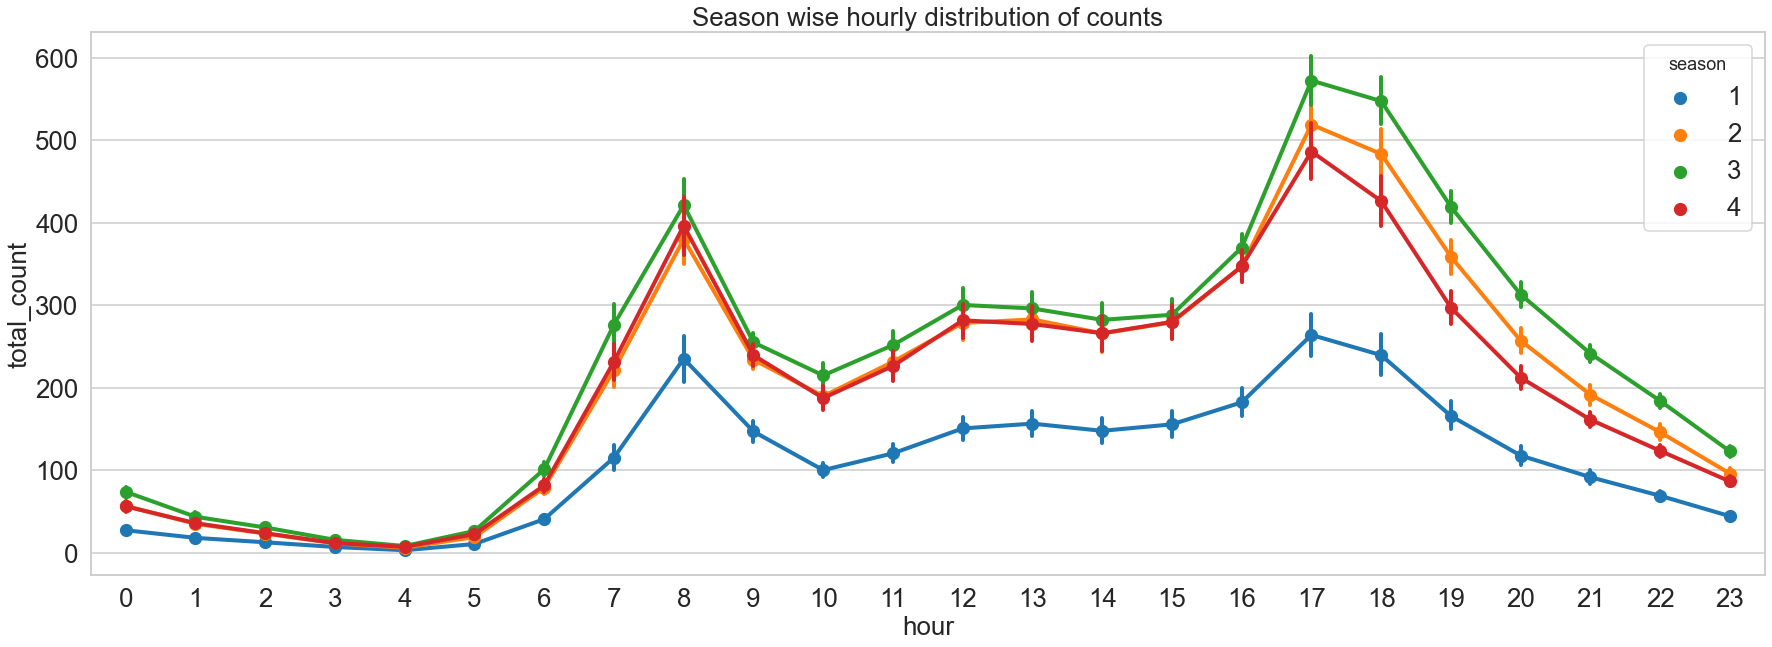

In [8]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title='Season wise hourly distribution of counts')

Note : 

Tren serupa terjadi untuk semua musim dengan puncak penghitungan pada pagi hari antara pukul 7-9 pagi dan sore hari antara pukul 4 hingga 6 sore, kemungkinan karena pergerakan yang tinggi selama awal dan akhir jam kantor. Jumlahnya terendah untuk musim semi, sementara musim gugur melihat pengendara tertinggi di semua 24 jam.

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

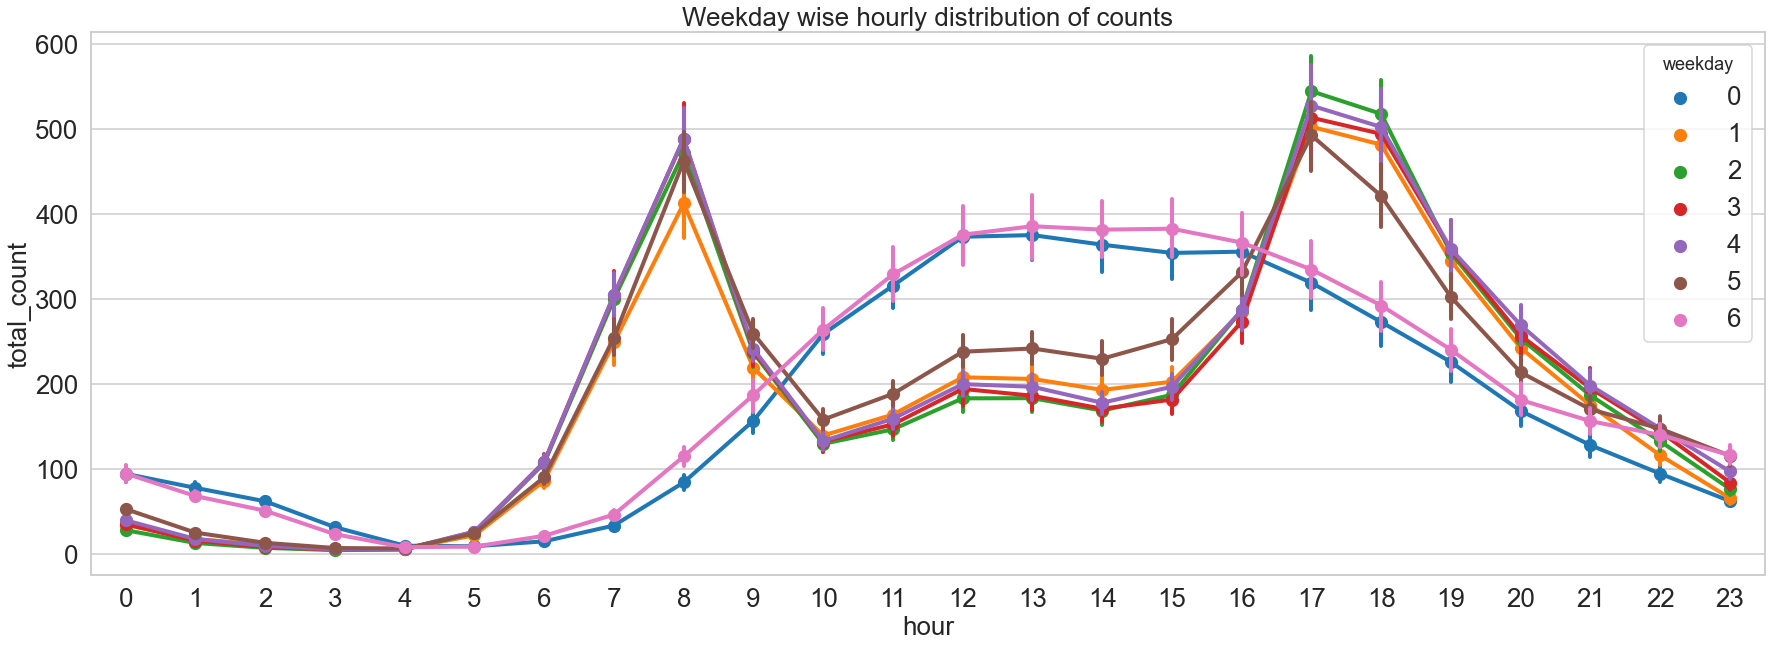

In [9]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

Note : 

Demikian pula, distribusi penumpang di sepanjang hari dalam seminggu juga menghadirkan tren menarik dari penggunaan yang lebih tinggi selama jam sore selama akhir pekan, sementara hari kerja melihat penggunaan yang lebih tinggi selama pagi dan malam hari.

Setelah mengamati distribusi data per jam di berbagai kategori, mari kita lihat apakah ada tren agregat. Cuplikan berikut membantu kami memvisualisasikan tren penumpang bulanan menggunakan seaborn's barplot().

# Monthly distribution of Total Counts

[Text(0.5, 1.0, 'Monthly distribution of counts')]

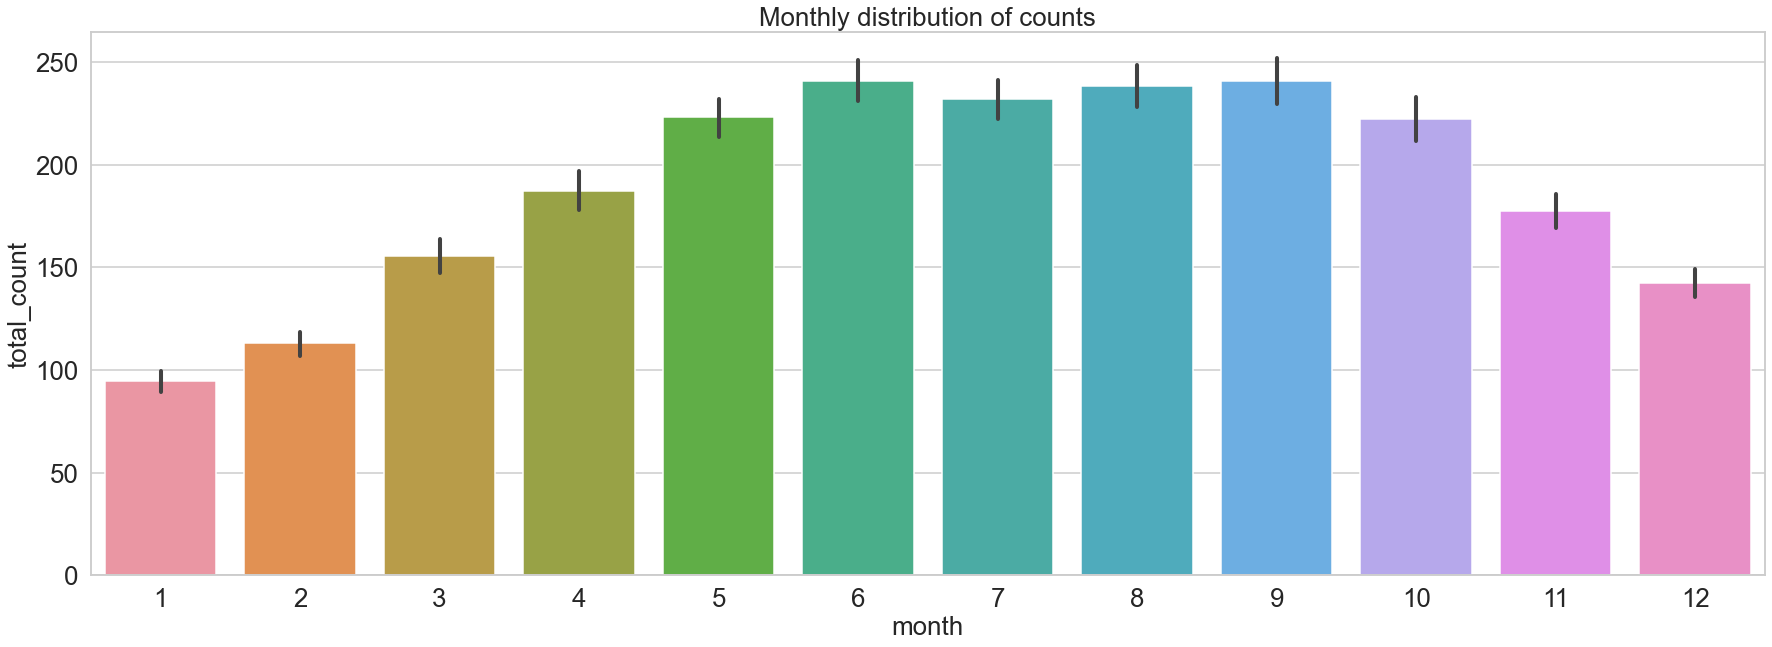

In [10]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                         'total_count']],
           x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Winter')]

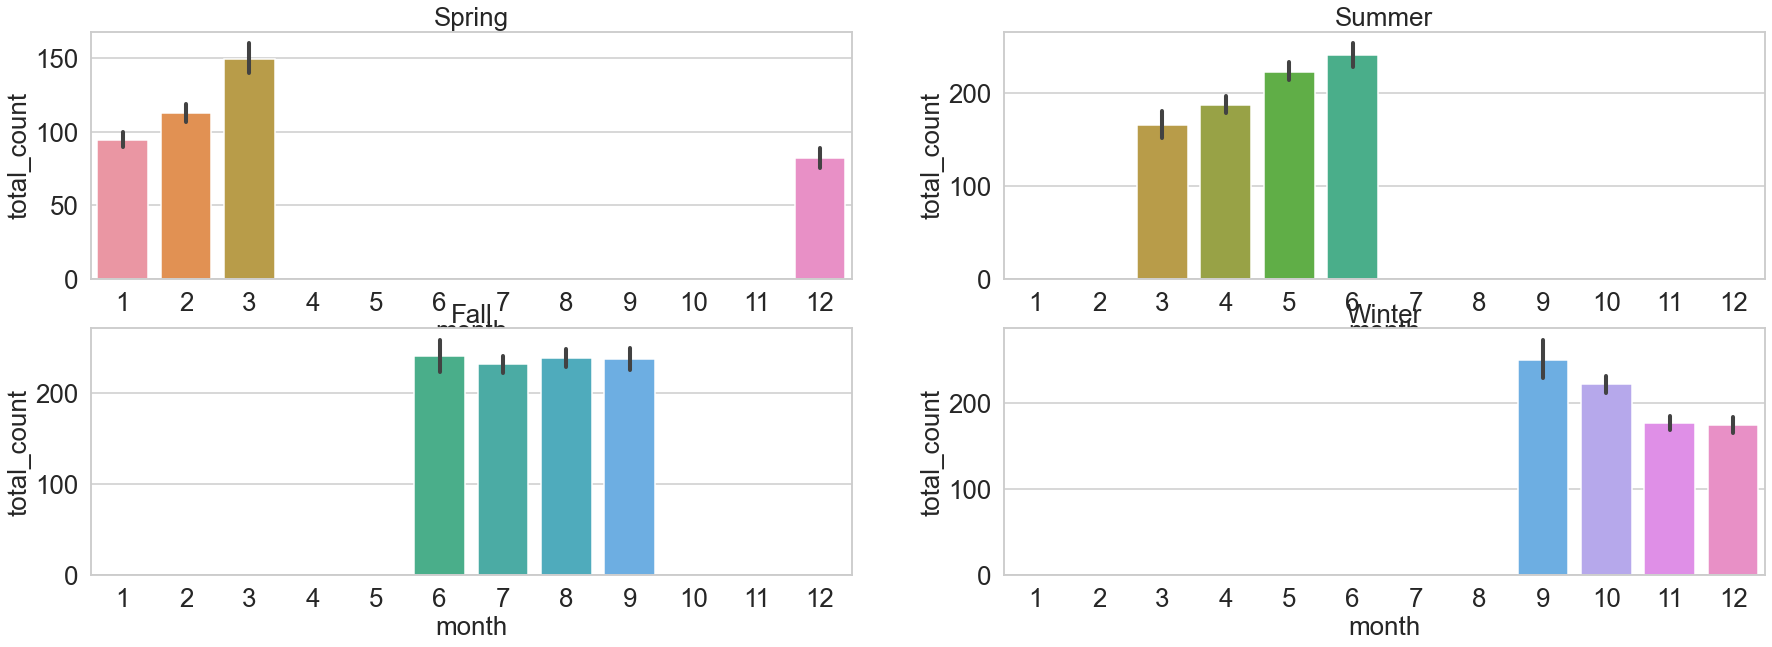

In [11]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season==1][df_col_list]
summer_df = hour_df[hour_df.season==2][df_col_list]
fall_df = hour_df[hour_df.season==3][df_col_list]
winter_df = hour_df[hour_df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sns.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sns.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Winter")

* Barplot yang dihasilkan menampilkan tren pasti dalam jumlah penumpang berdasarkan bulan dalam setahun. 
* Bulan Juni-September melihat penumpang tertinggi. 
* Sepertinya Musim Gugur adalah musim yang baik untuk program Berbagi Sepeda di Washington, D.C.

# Working Day Vs Holiday Distribution

<AxesSubplot:xlabel='is_workingday', ylabel='total_count'>

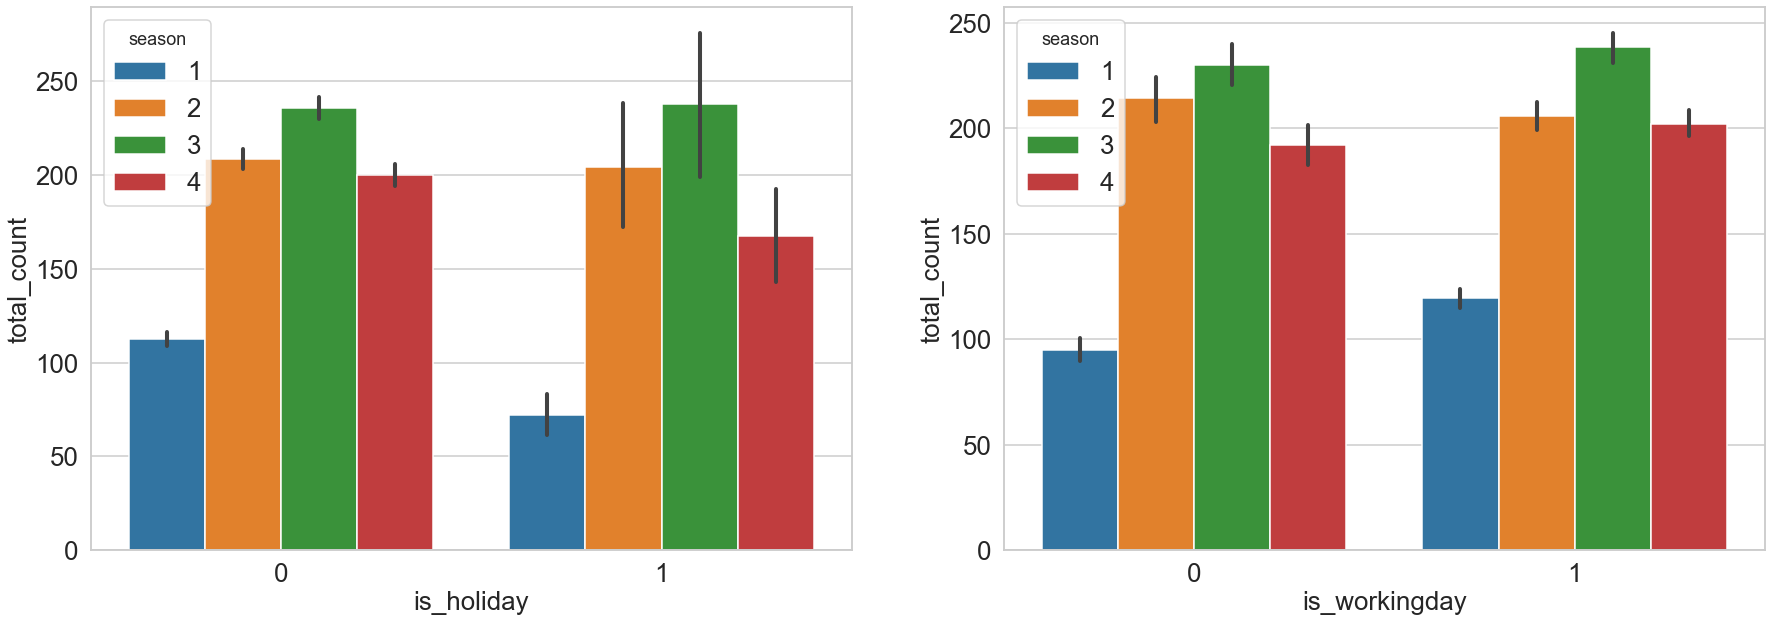

In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

# Outliner

* Outliner dapat berdampak buruk dan parah pada langkah-langkah hilir seperti pemodelan dan hasilnya.

* Kami biasanya menggunakan boxplot untuk memeriksa outlier dalam data. Dalam cuplikan berikut, kami menganalisis outlier untuk atribut numerik seperti total_count, temperature, dan wind_speed.

<AxesSubplot:>

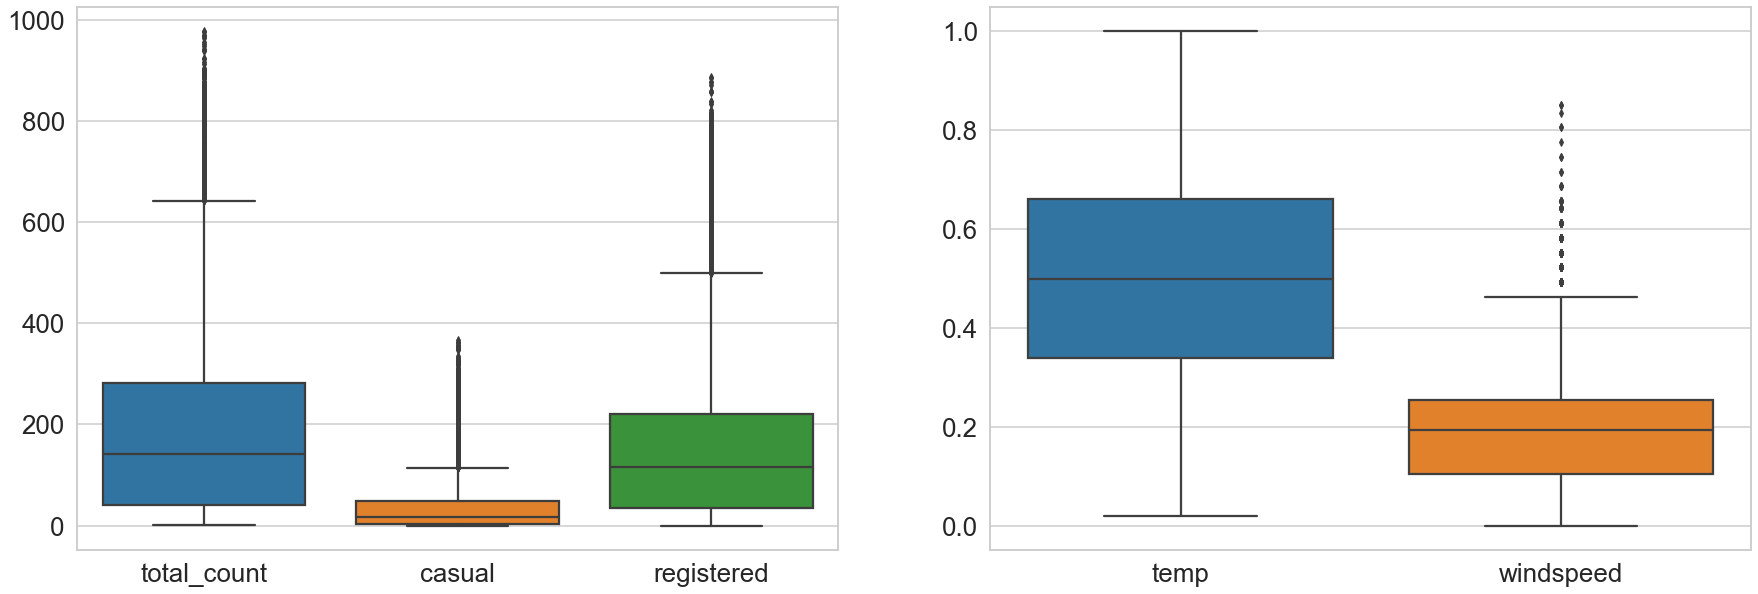

In [13]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['total_count',
                         'casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

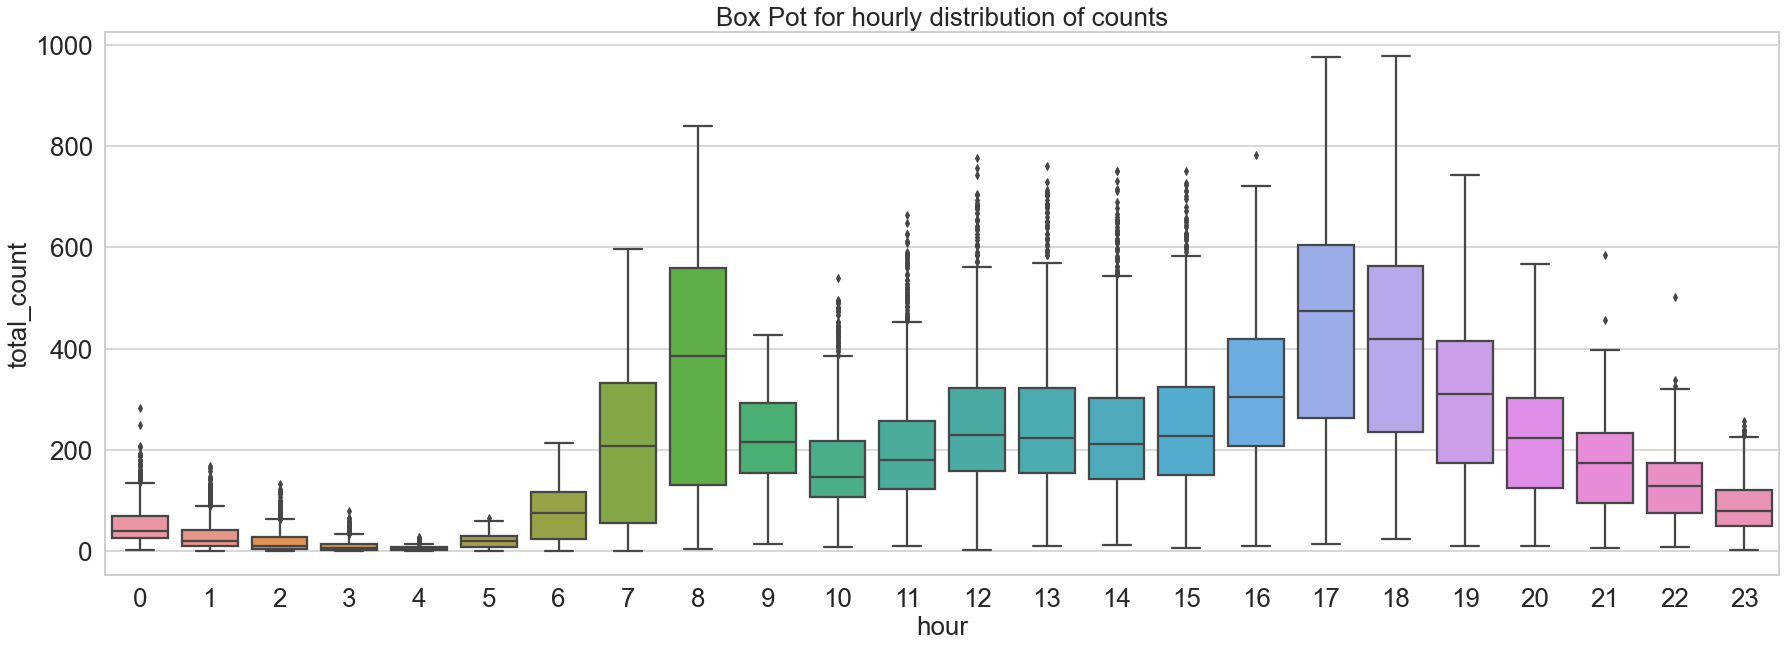

In [14]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

* Jam-jam awal (0-4) dan larut malam (21-23) memiliki jumlah yang rendah tetapi masih juga memiliki outlier yang signifikan
* Jam sore juga memiliki outlier
* Jam sibuk (7-8 dan 17-18) memiliki median yang lebih tinggi dan jumlah keseluruhan dengan hampir tidak ada outlier

# Correlations

<AxesSubplot:>

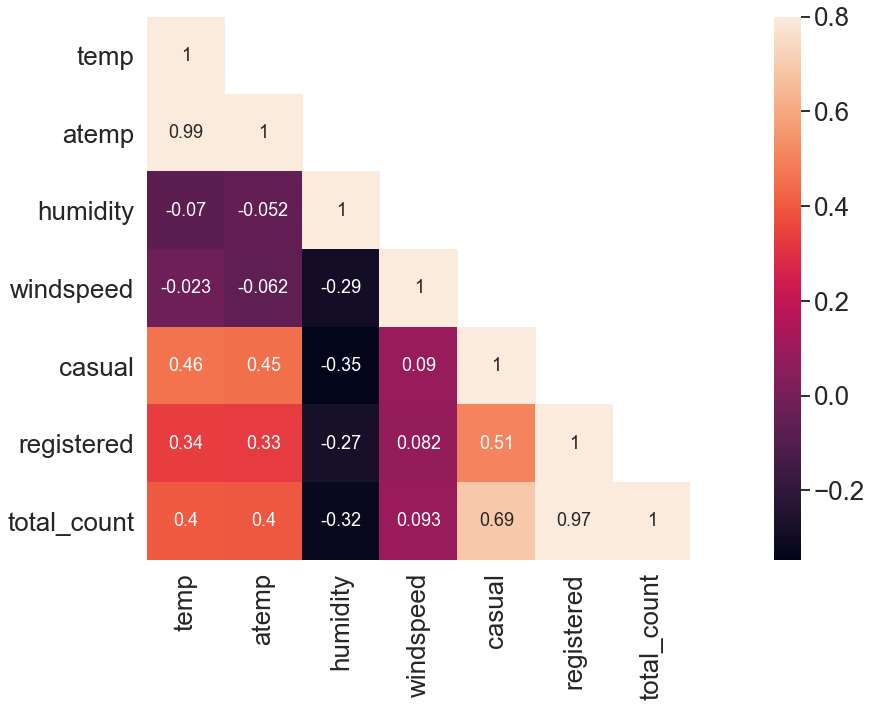

In [15]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

* Korelasi antara suhu dan suhu sangat tinggi (seperti yang diharapkan)
* Sama halnya dengan jumlah_jumlah terdaftar dan jumlah_jumlah biasa
* Kecepatan angin terhadap kelembaban memiliki korelasi negatif
* Statistik korelasional keseluruhan tidak terlalu tinggi.

# Encode Categoricals (One Hot Encoding)

Tahap berikutnya akan di lakukan pemodelan guna mendapatkan predictive yang tepat dengan dan diawali dari splitting dataset 

In [16]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

# Train-Test Split

In [17]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


# Normality Test

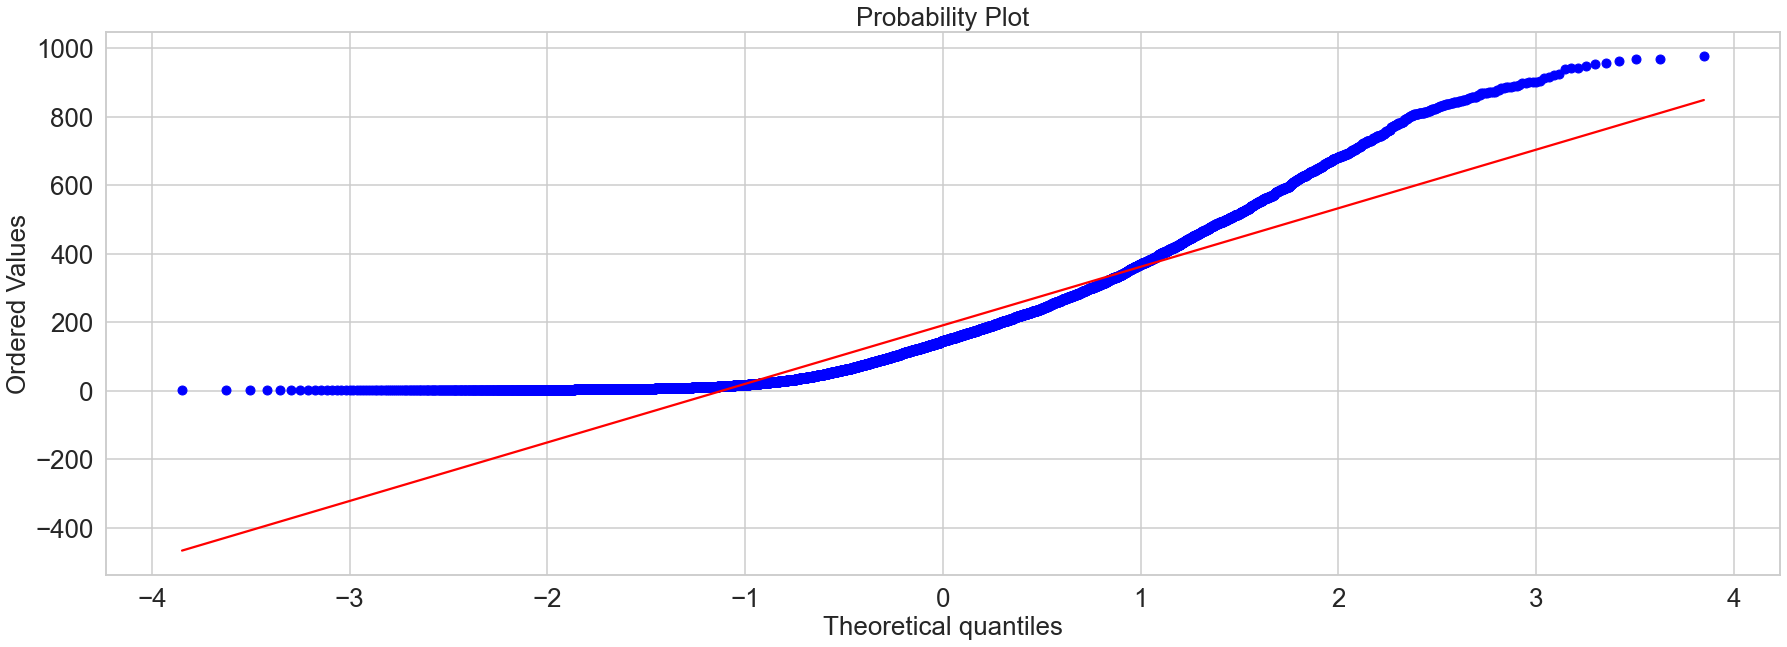

In [18]:
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

Cuplikan berikut menampilkan fungsi ke satu variabel kategorikal hot encode , berdasarkan:
metodologi yang kita bahas secara rinci dalam theory Rekayasa dan Seleksi Fitur.

In [19]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [20]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

Note : 
    
Meskipun kami telah mengubah semua kategorikal menjadi satu hot encoding , perhatikan bahwa atribut ordinal seperti hour, weekday, dan sebagainya tidak memerlukan pengkodean seperti itu.    

Selanjutnya, kami menggabungkan kategorikal numerik dan satu hot encoding  ke dalam dataframe yang akan kami gunakan untuk tujuan pemodelan kami. Cuplikan berikut membantu kami menyiapkan kumpulan data yang diperlukan.

In [21]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


Kami menyiapkan dataframe baru menggunakan atribut kategorikal numerik dan satu hot encoding dari dataframe pelatihan awal. Dataframe awal memiliki 10 atribut seperti itu (termasuk numerik dan kategorikal). Pasca transformasi ini, dataframe baru memiliki 19 atribut karena satu hot encoding kategorikal.

# Modeling Linear Regression

Sekarang setelah kita memiliki latar belakang tentang regresi linier dan OLS, kita akan mulai dengan pembuatan model. Model regresi linier diekspos melalui modul linear_model scikit-learn. Seperti semua algoritme Machine Learning di scikit, ini juga berfungsi pada tema fit() dan predict() yang sudah dikenal. Cuplikan berikut menyiapkan objek regresi linier untuk kita.

In [22]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

* Salah satu cara sederhana untuk melanjutkan adalah memanggil fungsi fit() untuk membangun model regresi linier kami dan kemudian memanggil fungsi predict() pada kumpulan data pengujian untuk mendapatkan prediksi untuk evaluasi. 

* Kami juga ingin mengingat aspek overfitting dan mengurangi pengaruhnya dan mendapatkan model yang dapat digeneralisasikan. Seperti yang telah dibahas di bagian sebelumnya dan bab sebelumnya, validasi silang adalah salah satu metode untuk menjaga overfitting.

* Dengan demikian, kami menggunakan validasi silang k-fold (khususnya 10 kali lipat) seperti yang ditunjukkan pada cuplikan berikut.

In [23]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)

* Fungsi cross_val_predict() diekspos melalui modul model_selection dari sklearn. 

* Fungsi ini mengambil objek model, prediktor, dan target sebagai input. Kami menentukan k di k-fold menggunakan parameter cv. Dalam contoh kami, kami menggunakan validasi silang 10 kali lipat. 

* Fungsi ini mengembalikan nilai prediksi yang divalidasi silang seperti yang dipasang oleh objek model.

* Kami menggunakan plot pencar untuk menganalisis prediksi kami. Cuplikan berikut menggunakan matplotlib untuk menghasilkan plot sebar antara residu dan nilai yang diamati.

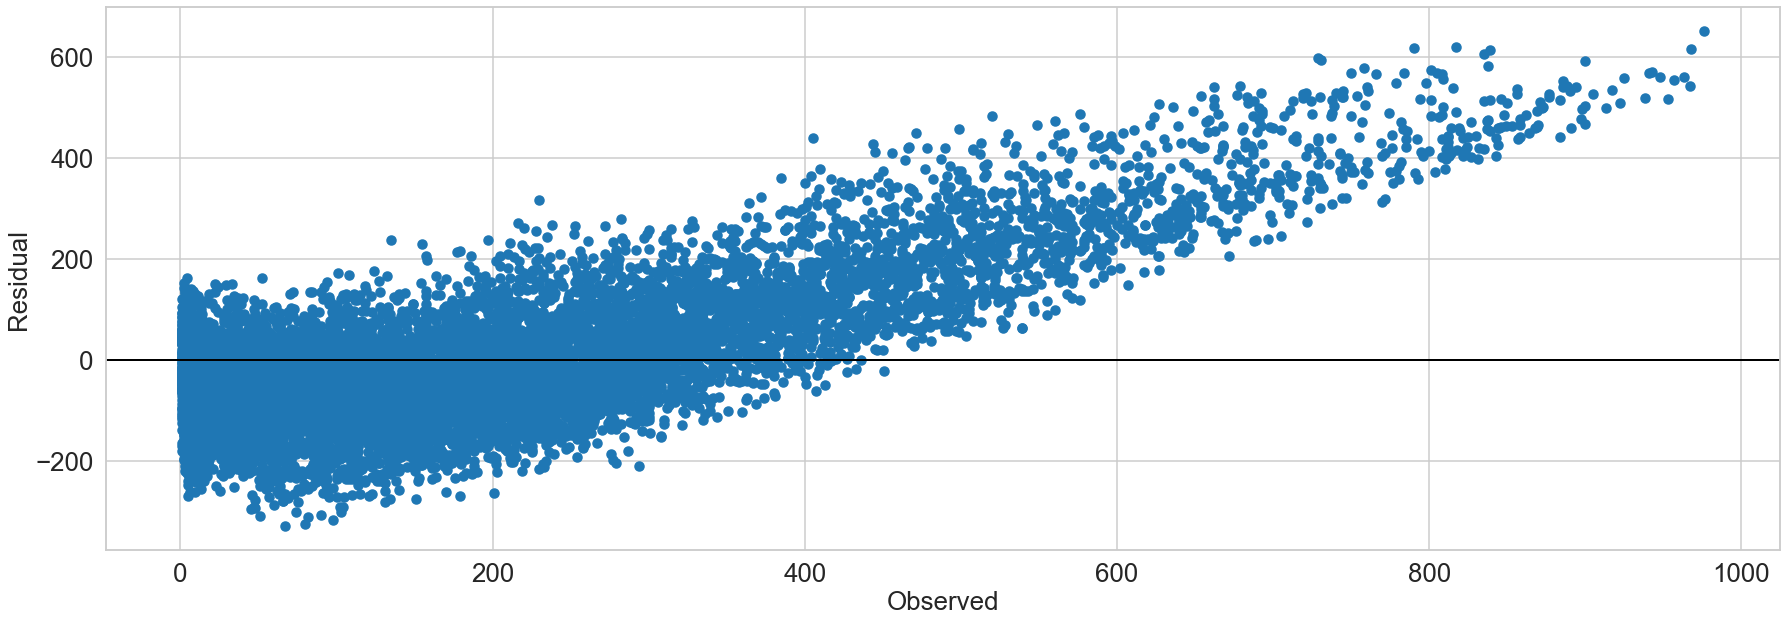

In [24]:
fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Note :
    
Ilustrasi Gambar tersebut jelas bertentangan dengan asumsi homoskedastisitas, yaitu tentang residual yang acak dan tidak mengikuti pola apapun. Untuk lebih mengukur temuan kami terkait dengan model, kami memplot cross-validation scores. Kami menggunakan fungsi cross_val_score() yang tersedia sebagai bagian dari modul model_selection

In [25]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

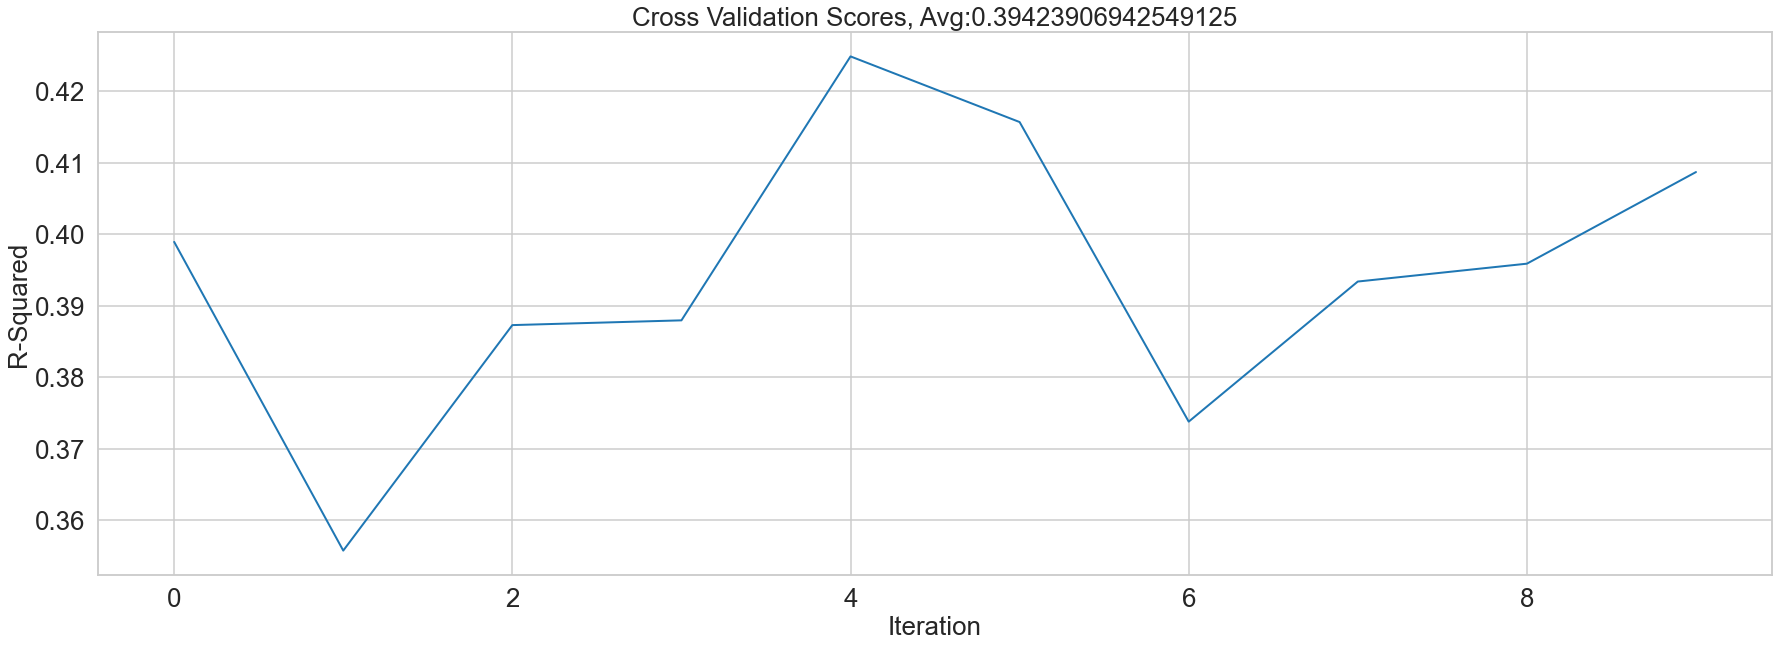

In [26]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [27]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.39894459 0.35575732 0.3873037  0.38796861 0.42489499 0.41571164
 0.37379762 0.39339864 0.39589746 0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21044.42416385 -18899.05989574]


In [28]:
lin_reg.fit(X,y)

LinearRegression()

# Testing

Sebelum kita dapat menggunakan dataset uji pada garis regresi yang dipelajari, kita perlu memastikan bahwa atribut telah melalui prapemrosesan yang sama di set pelatihan dan pengujian. Karena kami mengubah variabel kategori menjadi one hot encoding di train dataset, dalam cuplikan berikut kami juga melakukan tindakan yang sama pada test dataset.

In [29]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [30]:
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Bagian terakhir dari puzzel ini adalah dengan menggunakan fungsi predict() dari objek LinearRegression dan membandingkan hasil/prediksi kita. Cuplikan berikut melakukan tindakan tersebut.

In [31]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred

In [32]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.4024409682673429
MSE: 19063.00


Kami juga menghitung residu dan menggunakannya untuk menyiapkan plot residu, mirip dengan yang kami buat selama langkah pelatihan. Cuplikan berikut memplot plot residual pada set data pengujian.

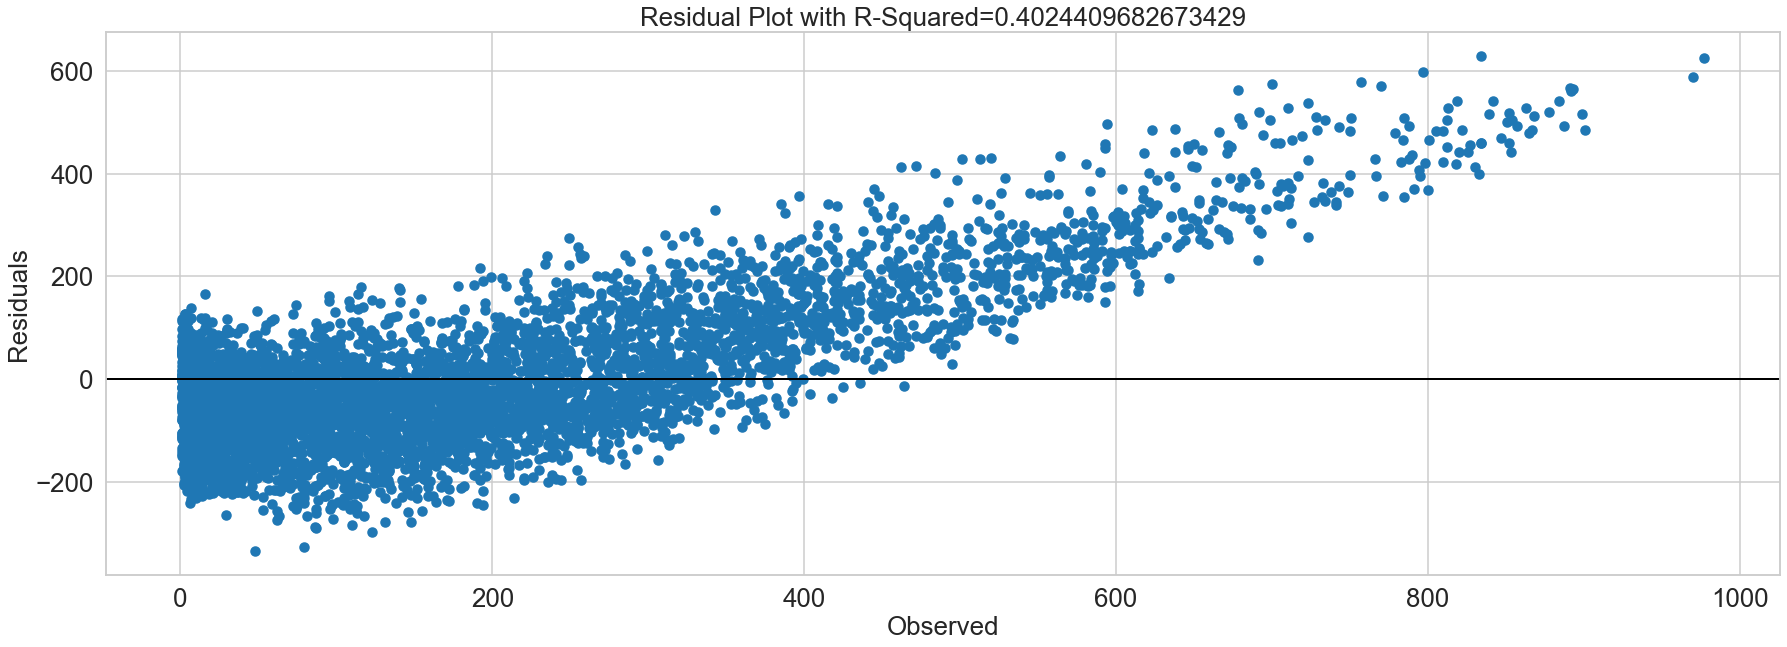

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

Note :

* Jelas terlihat dari evaluasi kami bahwa model regresi linier tidak dapat memodelkan data untuk menghasilkan hasil yang layak. Meskipun perlu dicatat bahwa model tersebut berkinerja sama pada set data pelatihan dan pengujian. Sepertinya kasus di mana kita perlu memodelkan data ini menggunakan metode yang dapat memodelkan hubungan non-linear.

* Untuk itu kita akan lakukan lagi pemodelan degan menggunakan algorithms yang lain  dalam hal ini " Decision Tree "
    

# Decision Tree Algorithms

Kita tambahkan dulu libraries yang perlukan

In [34]:
%matplotlib inline

# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
import pydotplus 
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# plotting libraries
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

# Load Dataset

In [35]:
hour_df = pd.read_csv('hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


# Preprocessing

* Standarize column names
* Typecast attributes
* Encode Categoricals using One Hot Encoding

# Standarize Column Names

In [36]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

# Typecast Attributes

In [37]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

# Encode Categoricals (One Hot Encoding)

In [38]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

# Train Test Split

In [39]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [40]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [41]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [42]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


# Decision Tree based Regression

In [43]:
X = train_df_new
y = y.total_count.values.reshape(-1,1)

In [44]:
X.shape,y.shape

((11643, 19), (11643, 1))

# Sample Decision Tree Regressor

* Proses training untuk decision tree akan  sedikit dilibatkan dan berbeda dibandingkan dengan regresi linier. Meskipun kami melakukan validasi silang saat melatih model regresi linier kami, kami tidak memiliki hyperparameter untuk disetel. 

* Sebelum kita membahas secara spesifik untuk mendapatkan hyperparameter yang optimal, kita akan melihat DecisionTreeRegressor dari modul tree sklearn. 

* Kami melakukannya dengan membuat instance objek regressor dengan beberapa hyperparameter yang ditetapkan sebagai berikut.

In [45]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X,y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

Cuplikan kode ini menyiapkan objek DecisionTreeRegressor yang diatur untuk memiliki kedalaman maksimum 4, node daun maksimum sebagai 10, dan jumlah sampel minimum yang diperlukan untuk membagi sebuah node menjadi 5. Meskipun bisa lebih banyak lagi, contoh ini menguraikan bagaimana hyperparameters digunakan dalam algoritma.

In [46]:
dtr.score(X,y)

0.5645919317952333

In [48]:
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png("bikeshare.png")

True

from IPython.display import Image
![title](bikeshare.png)

* Sekarang kita mulai dengan proses pelatihan yang sebenarnya. Seperti yang harus dibuktikan dari alur kerja kami sejauh ini, kami akan melatih regressor kami menggunakan cross validation  k-fold. Karena kita juga memiliki hyperparameters dalam kasus decision tree yang perlu pertimbangkan, kita memerlukan metode untuk menyempurnakannya juga.

* Ada banyak cara untuk menyempurnakan hyperparameter, yang paling umum adalah pencarian grid dan pencarian acak, dengan pencarian grid menjadi yang lebih populer. Seperti namanya, pencarian acak secara acak mencari kombinasi hyperparameters untuk menemukan kombinasi terbaik, pencarian grid di sisi lain adalah pendekatan yang lebih sistematis di mana semua kombinasi dicoba sebelum yang terbaik diidentifikasi. Untuk membuat hidup kita lebih mudah, sklearn menyediakan utilitas untuk pencarian grid hyperparameters sambil memvalidasi silang model menggunakan metode GridSearchCV() dari modul model_selection.

* Metode GridSearchCV() mengambil objek Regression/Classifier sebagai parameter input bersama dengan library hyperparameter, jumlah validasi silang yang diperlukan, dan beberapa lainnya. Kami menggunakan library berikut untuk mendefinisikan grid hyperparameter kami.

# Grid Search With Cross Validation

In [49]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

Note :

* Library pada dasarnya menyediakan daftar nilai yang layak untuk setiap hyperparameter yang ingin kita sempurnakan. Hyperparameter adalah kunci, sedangkan nilai disajikan sebagai daftar nilai yang mungkin dari hyperparameter ini. Misalnya, library kami menyediakan max_depth dengan kemungkinan nilai 2, 6, dan 8 level. 

* Fungsi GridSearchCV() pada gilirannya akan mencari dalam daftar nilai yang ditentukan ini untuk sampai pada satu nilai terbaik. Cuplikan berikut menyiapkan objek GridSearchCV dan menyesuaikan set data pelatihan kami dengannya.
    

In [50]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [ ]:
grid_cv_dtr.fit(X,y)

# Cross Validation: Best Model Details

In [ ]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

In [ ]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head()

In [ ]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

# Residual Plot

In [ ]:
predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y.flatten()-predicted

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

In [ ]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

# Setting the model for Testing

In [ ]:
best_dtr_model = grid_cv_dtr.best_estimator_

# Test Dataset Performance

In [ ]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,le,ohe,col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

In [ ]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

In [ ]:
y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten() - y_pred

In [ ]:
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

r2_score = grid_cv_dtr.best_estimator_.score(X_test,y_test)